## Amortizing Mortgage Loan - Debt Sizing
You consider to buy a new home for a purchase price of 400,000 USD. You have 150,000 USD in your savings account. Therefor you require another 250,000 USD from a Bank (Amortizing Mortgage) to realize the Deal. Your local Bank quotes the following Mortgage terms.

- Initial Loan Amount shall not exceed 75% of Purchase Price.
- Fixed Interest rate 5.0% p.a (compounded monthly)
- Initial Term with fixed interest rate is 30 years
- Outstanding Loan Amount after 30 Years shall not exceed 100,000 USD
- Loan payments (interst & amortization) shall be made monthly in arrears
- Monthly loan payments shall not exceed 1/3 of your current monthly income of 4,800 USD

Calculate the __effective annual interest rate.
Maximize the Loan Amount__ (and minimize the funding required from your savings account)!
Calculate __interest compound, amortization component__ and __outstanding loan__ balance throughout the term and visualize!

In [1]:
import numpy as np

In [19]:
m = 12
pp = 400000 #(Purchase Price )
max_LTV = 0.75 #Maximum loan to value 75%
r = 0.05
available_income = 4800 #per month
DSCR = 3/1 #debt service coverage ratio means income must be 3 times higher than loan payment
cf = -available_income / DSCR
n = 30 #used to calcualte interest and amortization component and oudstanding loan balance
FV = -100000 #remaining loan amount after 30 yrs

In [4]:
er = (1 + r/m)**m - 1 #effective interest rate used to calcualte interest and amortization component and oudstanding loan balance later
er 

0.051161897881732976

In [9]:
cf #used to calcualte interest and amortization component and oudstanding loan balance

-1600.0

In [11]:
PV = np.pv(rate = r/m, nper = n*m, pmt = cf, fv = FV)
PV #Income is sufficient enought to get a loan amount of 320433

320433.2468378557

In [18]:
print("The initial loan amount is {} USD!".format(min(PV, max_LTV * pp))) 
#used to calcualte interest and amortization component and oudstanding loan balance

The initial loan amount is 300000.0 USD!


Calculate interest compound, amortization component and outstanding loan balance throughout the term and visualize!

In [15]:
import numpy as np

In [16]:
m = 12
loan = 300000
r = 0.05
cf = -1600
n = 30

In [35]:
300000 * (1 + r/m) + cf #This is the 1st month of interest(1+r/n) and the 1st payment (+ cf)

299650.0

In [37]:
(300000 * r)/ m

1250.0

In [22]:
(300000 * (1 + r/m) + cf) * (1 + r/m) + cf #Second loan payment

299298.5416666667

In [23]:
np.fv(rate = r/m, nper = n*m, pmt = cf, pv = loan) #The outstanding balance after 30 years

-8709.477623486891

In [24]:
final_balance = np.fv(rate = r/m, nper = n*m, pmt = cf, pv = loan)
final_balance #same as above ^^^

-8709.477623486891

In [25]:
range(0, 361)

range(0, 361)

In [32]:
rem_loan = np.fv(rate = r/m, nper = range(n*m + 1), pmt = cf, pv = loan)
rem_loan #shows loan balance after each month until th e360th month

array([-300000.        , -299650.        , -299298.54166667,
       -298945.61892361, -298591.22566913, -298235.35577608,
       -297878.00309181, -297519.16143803, -297158.82461069,
       -296796.9863799 , -296433.64048982, -296068.78065852,
       -295702.40057793, -295334.49391368, -294965.05430498,
       -294594.07536459, -294221.55067861, -293847.47380643,
       -293471.83828063, -293094.6376068 , -292715.86526349,
       -292335.51470209, -291953.57934668, -291570.05259396,
       -291184.9278131 , -290798.19834566, -290409.85750543,
       -290019.89857837, -289628.31482244, -289235.09946754,
       -288840.24571532, -288443.74673913, -288045.59568388,
       -287645.7856659 , -287244.30977284, -286841.16106356,
       -286436.33256799, -286029.81728702, -285621.60819238,
       -285211.69822652, -284800.08030246, -284386.74730372,
       -283971.69208416, -283554.90746784, -283136.38624896,
       -282716.12119166, -282294.10502996, -281870.33046758,
       -281444.79017786,

In [38]:
np.ppmt(rate = r/m, per = 1, nper = n*m, pv = loan, fv = final_balance)
#computes the payment against a loan principle .amortization amount for each month this has a per 1 for the very first amortization amount of 350 by taking th edifference away from the first and second entry from the array above

-350.0000000000002

In [40]:
amort = np.ppmt(rate = r/m, per = range(1, n*m + 1), nper = n*m, pv = loan, fv = final_balance)
amort 
#This shows all the difference of the above array from 1 - 360 representing the amortization payments 
#The amortization is the amount of your payment actually going towards your loan balnce not being eaten up by interest
#The initial payments hand on 350/1600 actually going toward the loan the remain balance was all paying interest

array([ -350.        ,  -351.45833333,  -352.92274306,  -354.39325448,
        -355.86989305,  -357.35268427,  -358.84165378,  -360.33682734,
        -361.83823079,  -363.34589008,  -364.85983129,  -366.38008059,
        -367.90666426,  -369.43960869,  -370.9789404 ,  -372.52468598,
        -374.07687217,  -375.63552581,  -377.20067383,  -378.77234331,
        -380.3505614 ,  -381.93535541,  -383.52675272,  -385.12478086,
        -386.72946745,  -388.34084023,  -389.95892706,  -391.58375592,
        -393.21535491,  -394.85375222,  -396.49897619,  -398.15105525,
        -399.81001798,  -401.47589306,  -403.14870928,  -404.82849557,
        -406.51528097,  -408.20909464,  -409.90996587,  -411.61792406,
        -413.33299874,  -415.05521957,  -416.78461632,  -418.52121888,
        -420.2650573 ,  -422.0161617 ,  -423.77456238,  -425.54028972,
        -427.31337426,  -429.09384665,  -430.88173768,  -432.67707825,
        -434.47989941,  -436.29023233,  -438.10810829,  -439.93355875,
      

In [43]:
np.ipmt(rate = r/m, per = 1, nper = n*m, pv = loan, fv = final_balance) 

array(-1250.)

In [46]:
interest = np.ipmt(rate = r/m, per = range(1, n*m + 1), nper = n*m, pv = loan, fv = final_balance)
interest # These are the remaining balances of interest on the 1600 payment

array([-1250.        , -1248.54166667, -1247.07725694, -1245.60674552,
       -1244.13010695, -1242.64731573, -1241.15834622, -1239.66317266,
       -1238.16176921, -1236.65410992, -1235.14016871, -1233.61991941,
       -1232.09333574, -1230.56039131, -1229.0210596 , -1227.47531402,
       -1225.92312783, -1224.36447419, -1222.79932617, -1221.22765669,
       -1219.6494386 , -1218.06464459, -1216.47324728, -1214.87521914,
       -1213.27053255, -1211.65915977, -1210.04107294, -1208.41624408,
       -1206.78464509, -1205.14624778, -1203.50102381, -1201.84894475,
       -1200.18998202, -1198.52410694, -1196.85129072, -1195.17150443,
       -1193.48471903, -1191.79090536, -1190.09003413, -1188.38207594,
       -1186.66700126, -1184.94478043, -1183.21538368, -1181.47878112,
       -1179.7349427 , -1177.9838383 , -1176.22543762, -1174.45971028,
       -1172.68662574, -1170.90615335, -1169.11826232, -1167.32292175,
       -1165.52010059, -1163.70976767, -1161.89189171, -1160.06644125,
      

In [47]:
amort + interest # adds interest to amortization(the amount actually being paid toward the home loan)

array([-1600., -1600., -1600., -1600., -1600., -1600., -1600., -1600.,
       -1600., -1600., -1600., -1600., -1600., -1600., -1600., -1600.,
       -1600., -1600., -1600., -1600., -1600., -1600., -1600., -1600.,
       -1600., -1600., -1600., -1600., -1600., -1600., -1600., -1600.,
       -1600., -1600., -1600., -1600., -1600., -1600., -1600., -1600.,
       -1600., -1600., -1600., -1600., -1600., -1600., -1600., -1600.,
       -1600., -1600., -1600., -1600., -1600., -1600., -1600., -1600.,
       -1600., -1600., -1600., -1600., -1600., -1600., -1600., -1600.,
       -1600., -1600., -1600., -1600., -1600., -1600., -1600., -1600.,
       -1600., -1600., -1600., -1600., -1600., -1600., -1600., -1600.,
       -1600., -1600., -1600., -1600., -1600., -1600., -1600., -1600.,
       -1600., -1600., -1600., -1600., -1600., -1600., -1600., -1600.,
       -1600., -1600., -1600., -1600., -1600., -1600., -1600., -1600.,
       -1600., -1600., -1600., -1600., -1600., -1600., -1600., -1600.,
      

In [48]:
import matplotlib.pyplot as plt 

[]

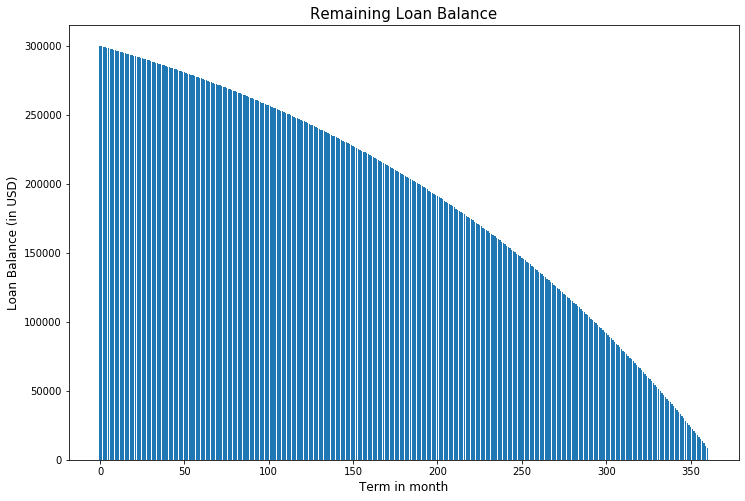

In [49]:
plt.figure(figsize = (12, 8))
plt.bar(range(0, n*m + 1), -rem_loan) # creates a bar plot with, range(0, n*m + 1) as x value , and rem_loan as y value
plt.title("Remaining Loan Balance", fontsize = 15)
plt.xlabel("Term in month", fontsize = 12)
plt.ylabel("Loan Balance (in USD)", fontsize = 12)
plt.plot()

[]

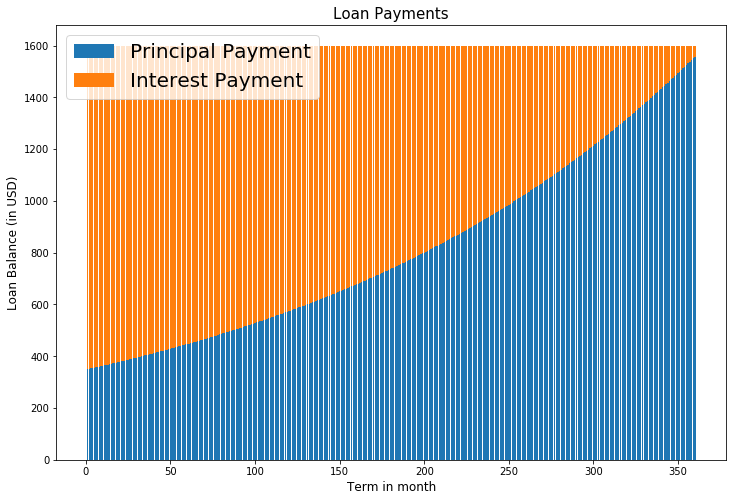

In [52]:
plt.figure(figsize = (12, 8))
plt.bar(range(1, n*m + 1), -amort, label = "Principal Payment") # creates a bar plot with, range(0, n*m + 1) as x value , and amortization as y value
plt.bar(range(1, n*m + 1), -interest, bottom = -amort, label = "Interest Payment")
plt.legend(fontsize = 20)
plt.title("Loan Payments", fontsize = 15)
plt.xlabel("Term in month", fontsize = 12)
plt.ylabel("Loan Balance (in USD)", fontsize = 12)
plt.plot()